In [1]:
import scipy.io as sio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy.stats import multivariate_normal

### 3(a)

In [4]:
data = sio.loadmat('hw07p3data.mat')
X1 = data['X1'].T  # (100, 2)
X2 = data['X2'].T  # (100, 2)

In [5]:
def nearest_neighbor(x):
    dist2X1 = min_dist(X1, x)
    dist2X2 = min_dist(X2, x)
    
    if dist2X1 < dist2X2:
        return 1
    else:
        return 2

In [6]:
def min_dist(X, x):
    return np.min(np.sum((X-x)**2.0, axis=1))

In [7]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

In [8]:
Z = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        Z[i,j] = nearest_neighbor([X[i,j], Y[i,j]])

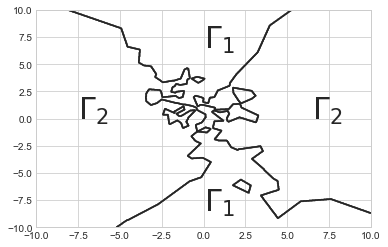

In [10]:
plt.contour(X, Y, Z)
plt.text(6.5, 0, r"$\Gamma_2$", size=30)
plt.text(-7.5, 0, r"$\Gamma_2$", size=30)
plt.text(0, -8.5, r"$\Gamma_1$", size=30)
plt.text(0, 6.5, r"$\Gamma_1$", size=30)
plt.savefig('p3a.png')
plt.show()

### 3(b)

In [11]:
mu1 = np.array([-1, 1])
mu2 = np.array([1, 0])

In [12]:
sigma1 = np.array([[3, -6],
                   [-6, 24]])
sigma2 = np.array([[16, -6],
                   [-6, 8]])

In [13]:
def bayes(x):
    if multivariate_normal.pdf(x, mean=mu1, cov=sigma1) > multivariate_normal.pdf(x, mean=mu2, cov=sigma2):
        return 1
    else:
        return 2

In [18]:
N = 100000

In [19]:
X1_test = np.random.multivariate_normal(mu1, sigma1, 50000)
X2_test = np.random.multivariate_normal(mu2, sigma2, 50000)

In [20]:
errors = 0
for i in range(X1_test.shape[0]):
    if bayes(X1_test[i,:]) != 1:
        errors +=1
        
for i in range(X2_test.shape[0]):
    if bayes(X2_test[i,:]) != 2:
        errors +=1
        
print(f"R(h_bayes) = {errors/N}")

R(h_bayes) = 0.21954


In [21]:
errors = 0
for i in range(X1_test.shape[0]):
    if nearest_neighbor(X1_test[i,:]) != 1:
        errors +=1
        
for i in range(X2_test.shape[0]):
    if nearest_neighbor(X2_test[i,:]) != 2:
        errors +=1
        
print(f"R(h_nearest) = {errors/N}")

R(h_nearest) = 0.32034
